In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [112]:
geo = pd.read_csv('Data/geolocation_olist_public_dataset.csv')
order = pd.read_csv('Data/olist_public_dataset_v2.csv')
cust = pd.read_csv('Data/olist_public_dataset_v2_customers.csv')
trans = pd.read_csv('Data/product_category_name_translation.csv')

## About the dataset
#### geo: Supposed to be a dataset of the geographic location of addresses in the dataset.

#### orders: Is the main dataset that contains information about orders from customers.

#### cust: Is a dataset that contains information about customers.

#### trans: This is a data set containing information about the translation of product category names. 

# *I. Geographic Analysis*

---

In this section, we will explore the market and its customers in a geological approach.

### *1) Market Distribution*

In [113]:
geo.head()

,zip_code_prefix,city,state,lat,lng
0,10,sao paulo,sp,-23.547807,-46.636122
1,10,sao paulo,sp,-23.546081,-46.644820
2,10,sao paulo,sp,-23.540984,-46.642569
3,10,sao paulo,sp,-23.546758,-46.645771
4,10,sao paulo,sp,-23.546362,-46.643073


It looks like the geographic dataset contains some duplicates. So we will need to remove them first.

In [114]:
geo = geo.drop_duplicates(subset=None, keep='first', inplace=False)

In [115]:
centroid = geo.groupby('zip_code_prefix').agg({
    'lat': 'median',
    'lng': 'median',
    'city': pd.Series.mode
}).reset_index()
centroid['count'] = geo.groupby('zip_code_prefix').size().reset_index(
    name='counts')['counts']

The following chart shows the distribution of the market in Brazil:

In [116]:
import plotly
import plotly.express as px

token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(centroid,
                        lat="lat",
                        lon="lng",
                        size="count",
                        color="count",
                        size_max=8,
                        color_continuous_scale=px.colors.sequential.Redor,
                        zoom=2.7)
fig.update_layout(mapbox_style="outdoors", mapbox_accesstoken=token)
fig.show()

As we can see, the market distribution is high in southern Brazil around lat: -22 and lng: -46. Therefore, it is recommended that the market distribution be balanced. Furthermore, if the company is interested in
expanding its market internationally, it is highly recommended to expand its market in the north and
west of Brazil as there are only a few surrounding markets to focus on the company's brand.

## 2) *Revenue Distribution*

In [117]:
order.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


It looks like the geographic dataset contains some duplicates seem like before. So we will need to remove them first.

In [118]:
order = order.drop_duplicates(subset=None, keep='first', inplace=False)

In [119]:
geo_order = pd.merge(centroid,
                     order,
                     how='right',
                     left_on='zip_code_prefix',
                     right_on='customer_zip_code_prefix')

In [120]:
geo_rev = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'order_products_value':
    'sum'
}).reset_index()

In [121]:
import plotly.express as px
token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(
    geo_rev,
    lat="lat",
    lon="lng",
    size="order_products_value",  
    color="order_products_value",  
    size_max=15,  
    color_continuous_scale=px.colors.sequential.Redor,  
    zoom=2.7,
    mapbox_style="outdoors"
)
fig.update_layout(mapbox_accesstoken=token)
fig.show()


As the chart above shows, we can conclude that there are three main hotspots, and they are located at around:
- Lat: -23, LNG: -46
- Lat: -22, LNG: -47
- Lat: -23, LNG: -43

These three places are the highest revenue markets. To increase the company's revenue, I recommend adding more markets around these three hotspots because there are many customers willing to spend their money there.

# *3) Customer distribution*

In [122]:
geo_order = geo_order.dropna(subset=['zip_code_prefix'])
geo_cust = geo_order.groupby('customer_zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'customer_id':
    'count'
}).reset_index()

In [123]:
token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(
    geo_cust,
    lat="lat",
    lon="lng",
    size="customer_id",  
    color="customer_id",  
    size_max=10,  
    color_continuous_scale=px.colors.sequential.Reds,  
    zoom=2.7,
    mapbox_style="outdoors"
)
fig.update_layout(mapbox_accesstoken=token)
fig.show()


As you can see the locations of these 3 hotspots are approximately the same as the previous hotspots, so
we can assume that these hotspots are simply similar. With higher customer
volumes, these places would be great places to expand your market because of the customer
interest in this market

# II. Time Series Analysis 

---

In this section, we will explore the market and customer interests based on a Time Series approach.

## 1) *Estimated delivery accuracy*

Using the *geo_order* variable that was built in the previous section, we will analyze the accuracy of the company's estimated delivery time. Furthermore, we will break down the case when
delivery is late and early. We will start by cleaning the data by changing the
type of the delivery date and estimated date variables to datetime.

In [124]:
geo_order['order_delivered_customer_date'] = pd.to_datetime(
    geo_order['order_delivered_customer_date'])
geo_order['order_estimated_delivery_date'] = pd.to_datetime(
    geo_order['order_estimated_delivery_date'])

Because orders can be canceled after purchase, there are empty rows in the delivery date column. Therefore, I will drop the rows with empty data.

In [125]:
geo_order = geo_order.dropna(subset=['order_delivered_customer_date'])

Next, I'll find the time between the estimated delivery date and the delivery date, measured in days.

In [126]:
geo_order['range_time'] = (geo_order['order_delivered_customer_date'] - geo_order['order_estimated_delivery_date']).dt.days

Furthermore, we need to identify which customers receive the product earlier than the expected delivery date and which customers have delayed receipt (late delivery). Because I have defined it as a time interval, I will take the absolute value for negative times in the case of early arrival.

In [127]:
delay = geo_order['range_time'][geo_order['range_time'] > 0]
early = abs(geo_order['range_time'][geo_order['range_time'] < 0])

### *A. Early delivery*

First, I'll divide the early delivery dataset created above into 5 categories as follows:

In [128]:
bins = [0, 3, 7, 14, 30, 90]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', 'More than 1 month'
]
early = pd.cut(early, bins=bins, labels=labels)

<Axes: xlabel='count', ylabel='range_time'>

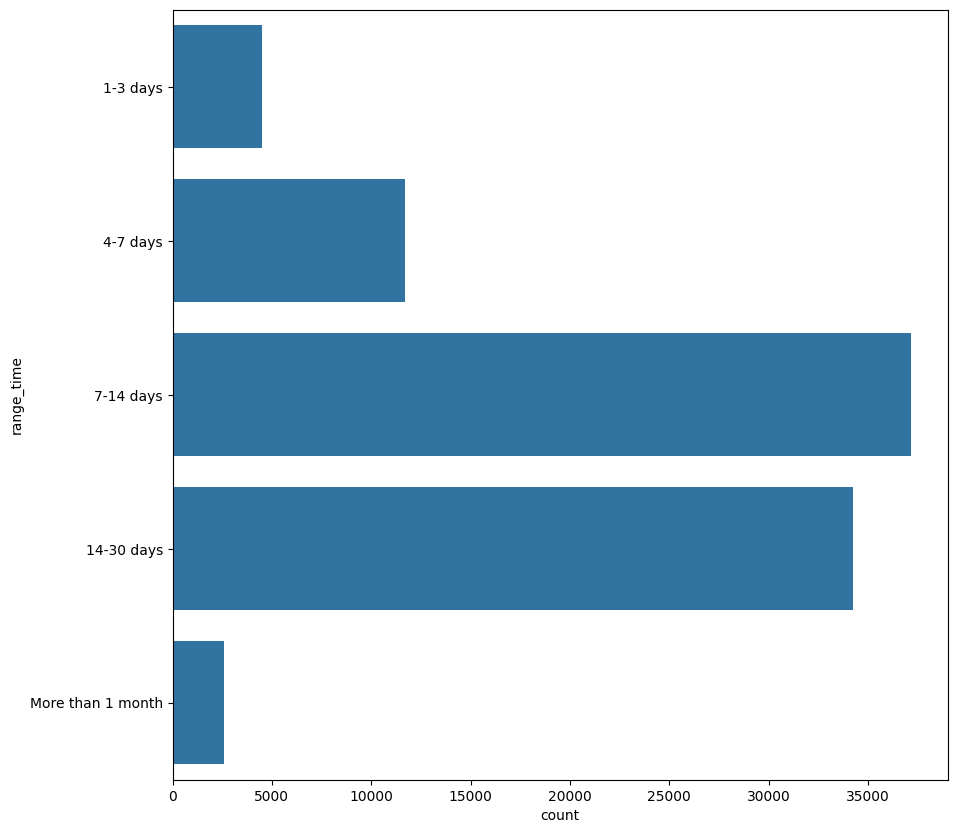

In [129]:
sns.countplot(y=early)

As the chart above shows, the early delivery is mostly in the range of 7-14 days and 14-30 days. However, it may be good for the customer to receive the goods early, and it also shows the inaccuracy between the actual delivery date and the predicted delivery date. This issue can also affect the customer, they may consider canceling the order because the estimated delivery date is longer than the actual one.

### B) *Delayed Delivery*

First, I'll divide the *delay* delivery dataset created above into 5 categories as I do before:

In [130]:
bins = [0, 3, 7, 14, 30, 90, 300]
labels = [
    '1-3 days', '4-7 days', '7-14 days', '14-30 days', '1-3 month',
    'More than 3 months'
]
delay = pd.cut(delay, bins=bins, labels=labels)

<Axes: xlabel='count', ylabel='range_time'>

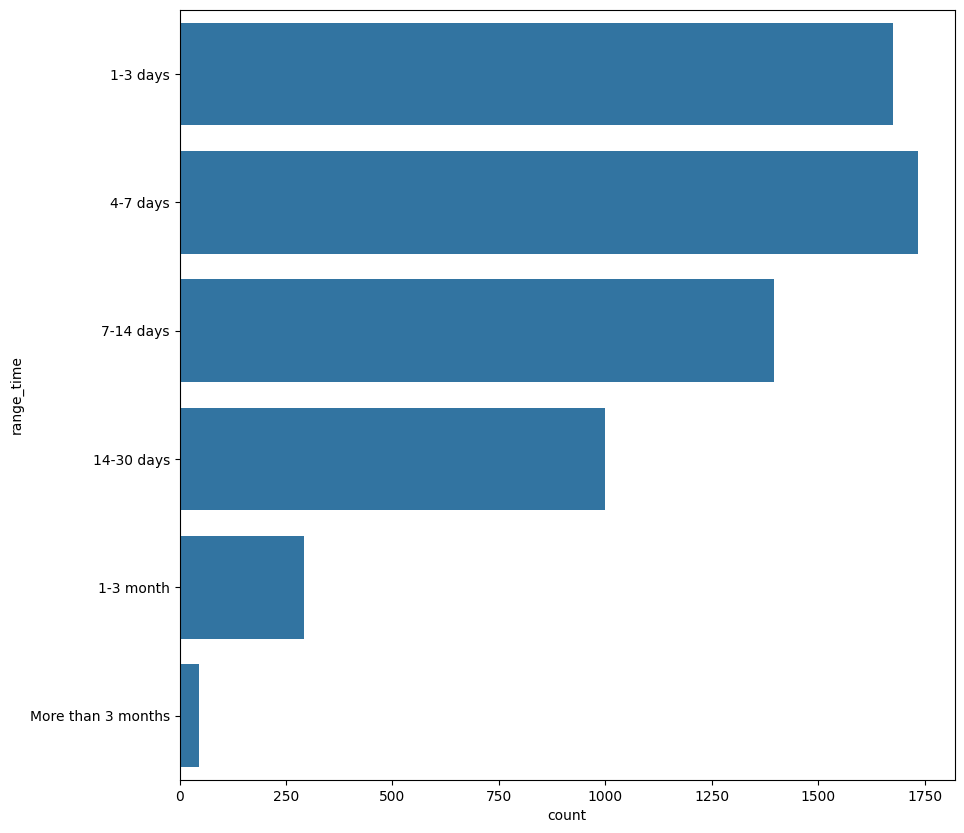

In [131]:
sns.countplot(y=delay)

As the chart shows above, the delivery delays are mostly in the range of 4-7 days and 1-3 days. This may be an issue that the company needs to consider to re-examine the delivery time estimation tools, as there are many customers who are in the range of 4-7 days. Moreover, there are some deliveries that are delayed for more than 1 month, even 3 months, which will significantly reduce customer satisfaction.



Next, we will look at which locations have a high rate of delayed deliveries. We will
default the delay to 1 if it is delayed and 0 if it is not delayed

In [132]:
geo_order['range_time_default'] = geo_order['range_time'].apply(
    lambda x: 1 if x > 0 else 0)

In [133]:
delay_place = geo_order.groupby('zip_code_prefix').agg({
    'lat':
    'median',
    'lng':
    'median',
    'range_time_default':
    'mean'
})

In [134]:
token = 'pk.eyJ1IjoiZmFhdGhpcjk4IiwiYSI6ImNrMGVxMTl5dzBiZHYzYm1wMm15b2RhcXQifQ.InHG7-SGeNMtnnfkvIVCRg'
fig = px.scatter_mapbox(
    delay_place,
    lat="lat",
    lon="lng",
    size="range_time_default",  
    color="range_time_default",  
    color_continuous_scale=px.colors.sequential.Reds,  
    mapbox_style="outdoors" 
)
fig.update_layout(mapbox_accesstoken=token)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()


As we can see, from the chart above, there are some hotspots with high rates of delayed deliveries. These hot spots should be a concern for the delivery company, as delayed deliveries have a huge impact on the company.

In [135]:
normal = geo_order['range_time'][geo_order['range_time'] == 0]
print('normal:',
      round(normal.count() * 100 / geo_order['range_time'].count(),
            3), '%', '\nearly:',
      round(early.count() * 100 / geo_order['range_time'].count(), 3), '%',
      '\ndelay:',
      round(delay.count() * 100 / geo_order['range_time'].count(), 3), '%')

normal: 1.259 % 
early: 92.44 % 
delay: 6.293 %


As we can see, the rate of early deliveries on the product is very high, approximately 92.5%. A high number of early deliveries may satisfy customers, but it is not accurate in the tools and measurements of expected delivery time. Moreover, even if the rate of late deliveries is low, this is still something that the company needs to pay attention to because there are some orders that are delayed by more than 1 month, even 3 months. This is an issue that the company needs to pay attention to in order to improve the performance of
delivery as well as reduce customer churn.

# 2) *Promotion period*

In this section, I will analyze the best time to promote the company's products
or launch new products. First, we need to change the purchase time data type
to date and time.

In [136]:
order['order_purchase_timestamp'] = pd.to_datetime(
    order['order_purchase_timestamp'])

### A. *Best hours*

First, I only take the hour part of the purchase time.

In [137]:
best_time_hours = (order.order_purchase_timestamp).dt.hour

Then I visualize to see what time customers buy the most.

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/57213417.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

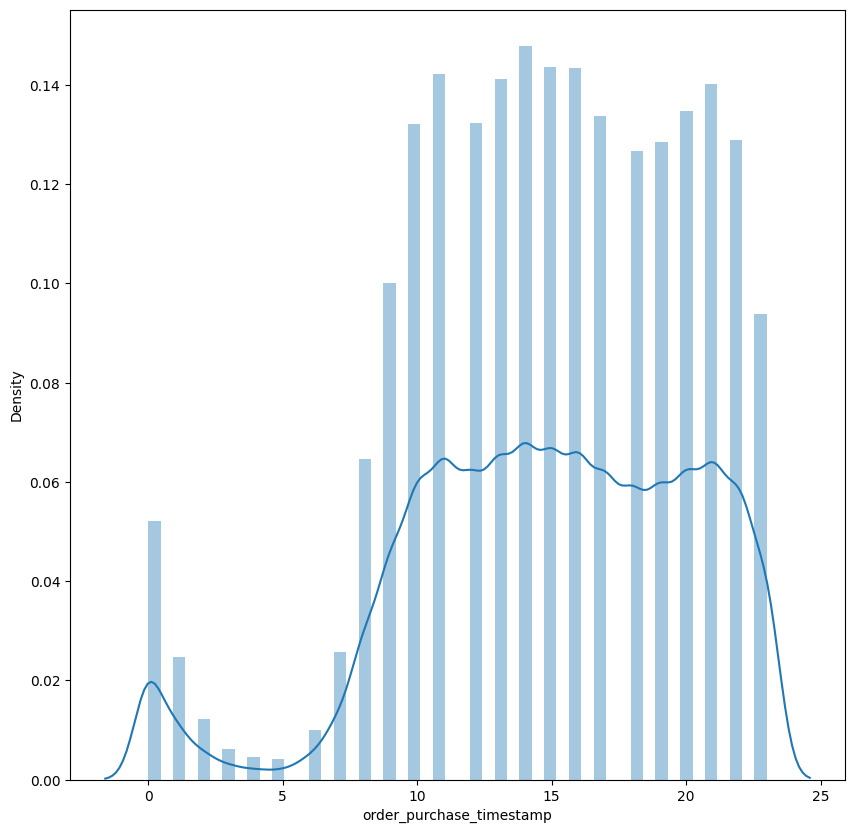

In [138]:
sns.distplot(best_time_hours)

As shown in the chart above, most customers buy products between 10am and 10pm.

### B. *Best days*


Similar to hours, I will find the days of the week when customers shop a lot.

In [139]:
best_time_day = order.order_purchase_timestamp.apply(lambda x: x.weekday())

Visualization:

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/886976007.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

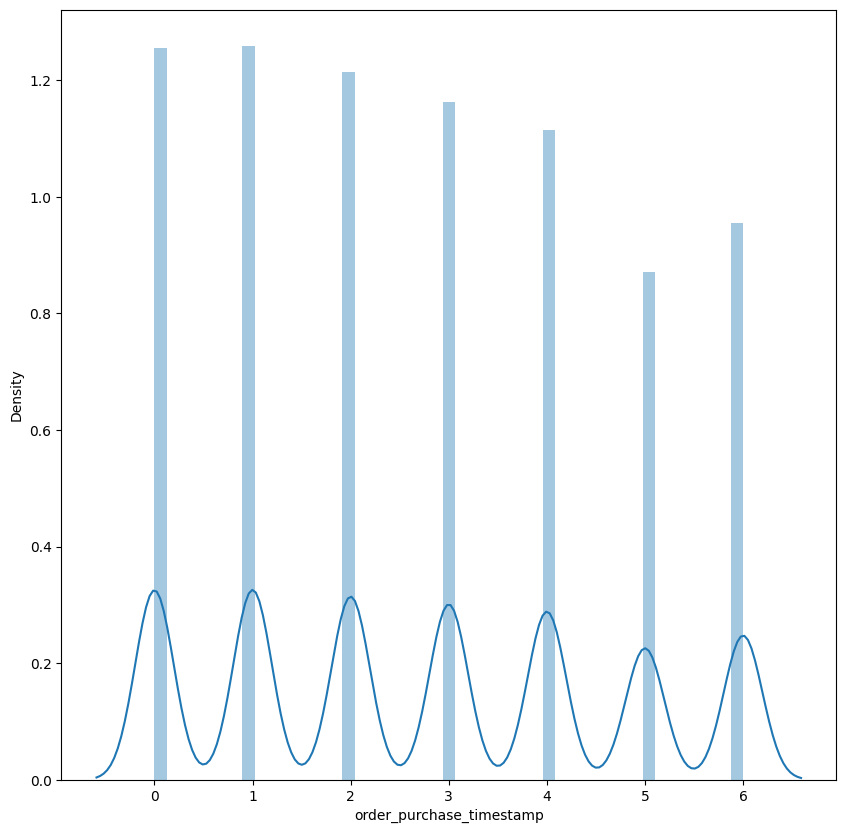

In [140]:
sns.distplot(best_time_day)

As we can see, the highest number of purchases is on Tuesday (1), followed by Thursday.
However, even on other days, the number of purchases is not too low, so it is advisable to avoid promoting the product on Saturday (5), as this is the lowest time

### 3) *Best Months*

Similarly, I will find the best month of the year to promote the product.

In [141]:
best_time_month = (order.order_purchase_timestamp).dt.month

Visualization

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/471846803.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

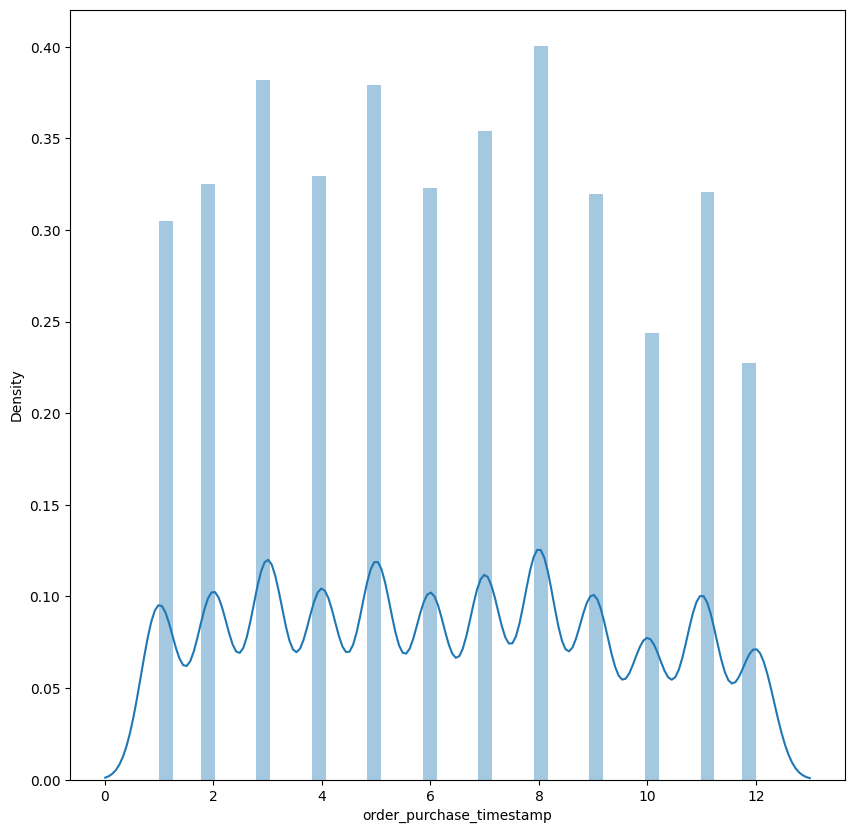

In [142]:
sns.distplot(best_time_month)

As shown in the figure above, the highest purchase volume is in August (8). However, even in other months, the purchase volume is not too low, we should only avoid promotions or advertising of products in December (12) because this is the lowest time.

Based on the previous analysis, we can give advice to companies to promote or
release new products on:
- Time: Around 10am - 10pm
- Day: Tuesday, Monday
- Month: August, February

It is also possible to promote at other times than the above mentioned, as it
does not differ significantly. However, there are some times when the number of purchases is low that companies
should avoid:
- Time: Around 3am - 5am
- Day: Saturday
- Month: December, October

# *III. Customer behavior analysis*


---

In this section I will analyze customer behavior and categorize each customer that needs further attention. Let's look at the customer data set.

In [143]:
cust.head()

,customer_id,customer_unique_id
0,0000ca4ff2795842fd6b122c6d974468,ac0e5d7f07043dd32831bdad3b99ad26
1,00010f206878ba01f199aec4237de72e,4ed24aaed4079fe0661c0e4b3b420dff
2,00012a2ce6f8dcda20d059ce98491703,7e0e291c0f4fc2d69208954d26ed0586
3,000161a058600d5901f007fab4c27140,ff1dcb27ea444eddb94ea5fea77b875c
4,00017f1d6cce0d56046219a2cfabcbbb,237130c4b6717031ed62d9d0b16fd94f


Let drop duplicates

In [144]:
cust = cust.drop_duplicates(subset=None, keep='first', inplace=False)

I will categorize customers based on recency, frequency, amount spent, and customer ‘age’
It looks like we need a dataset about orders, so we need to reference another dataset based on customer id

In [145]:
order_cust = pd.merge(cust,
                      order,
                      how='right',
                      left_on='customer_id',
                      right_on='customer_id')

In [146]:
order_cust.head()
order_cust['range_time'] = geo_order['range_time']

Next, to determine recency, I need to find the time interval between the most recent purchase and each purchase in the dataset. Furthermore, I need to determine recency as the most recent time each customer made a purchase.

In [147]:
recent = order_cust.groupby('customer_unique_id').agg({
    'range_time': lambda x: pd.Timedelta(x.min(), unit='D')
})


Then we need to determine the frequency by aggregating the items ordered by each customer.

In [148]:
frequent = order_cust.groupby('customer_unique_id').agg(
    {'order_items_qty': 'sum'})

To determine the monetary, we sum the values ​​of the items ordered by each customer.

In [149]:
monetary = order_cust.groupby('customer_unique_id').agg(
    {'order_products_value': 'sum'})

Next, we determine the customer ‘age’ by finding the earliest purchase date for each customer.

In [150]:
tenure = order_cust.groupby('customer_unique_id').agg({
    'range_time': lambda x: pd.Timedelta(x.max(), unit='D')
})

Then, we combine the above criteria into a table.

In [151]:
rfmt = pd.concat([recent, frequent, monetary, tenure], axis=1)
rfmt.columns = ['recency', 'frequency', 'monatary', 'tenure']

In [152]:
rfmt.describe()

,recency,frequency,monatary,tenure
count,90275,92516.000000,92516.000000,90275
mean,-13 days +18:06:53.217391305,1.189081,139.642552,-12 days +00:54:38.941013570
std,10 days 06:03:05.445103731,0.668332,212.630906,10 days 05:35:00.440254494
min,-147 days +00:00:00,1.000000,2.000000,-147 days +00:00:00
25%,-17 days +00:00:00,1.000000,49.000000,-17 days +00:00:00
50%,-13 days +00:00:00,1.000000,89.900000,-13 days +00:00:00
75%,-8 days +00:00:00,1.000000,155.377500,-7 days +00:00:00
max,188 days 00:00:00,25.000000,14776.000000,188 days 00:00:00


Next, we will rank each customer according to each criterion. There will be a rank from 1 to 5, in which rank 1 is the highest and rank 5 is the lowest.

In [153]:
label1 = [5, 4, 3, 2, 1]
label2 = [1, 2, 3, 4, 5]
rfmt['R'] = pd.qcut(rfmt['recency'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label1)
rfmt['F'] = pd.cut(rfmt['frequency'], bins=[0, 1, 2, 3, 5, 900], labels=label2)
rfmt['M'] = pd.qcut(rfmt['monatary'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)
rfmt['T'] = pd.qcut(rfmt['tenure'],
                    q=[0, 0.2, 0.4, 0.6, 0.8, 1],
                    labels=label2)

In [154]:
rfmt = rfmt.reset_index()

Create a customer group called ‘Best’

In [155]:
best = rfmt[rfmt.R.isin([4, 5]) & rfmt.F.isin([4, 5]) & rfmt.M.isin([4, 5])]
best['segment'] = 'BEST'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/3546318883.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Loyal Spender’

In [156]:
loyal_spender = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                     & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([3, 4, 5])]
loyal_spender['segment'] = 'LOYAL SPENDER'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/658045858.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Potential Loyal'

In [157]:
potential_loyal = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([2, 3])
                       & rfmt['M'].isin([2, 3]) & rfmt['T'].isin([1, 2])]
potential_loyal['segment'] = 'POTENTIAL LOYAL'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/798796110.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘New Customer'

In [158]:
new_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                & rfmt['M'].isin([1]) & rfmt['T'].isin([1, 2])]
new_cust['segment'] = 'NEW CUSTOMER'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/547541769.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Loyal Customer'

In [159]:
loyal_cust = rfmt[rfmt['R'].isin([4, 5]) & rfmt['F'].isin([1])
                  & rfmt['M'].isin([1]) & rfmt['T'].isin([3, 5])]
loyal_cust['segment'] = 'LOYAL CUSTOMER'

Create a customer group called ‘Promising'

In [160]:
promising = rfmt[rfmt['R'].isin([2, 3]) & rfmt['F'].isin([3, 5])
                 & rfmt['M'].isin([3, 5])]
promising['segment'] = 'PROMISING'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/2619193638.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Can Not Lose'

In [161]:
cant_lose = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                 & rfmt['M'].isin([4, 5])]
cant_lose['segment'] = 'CAN NOT LOSE'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/345917324.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘About To Sleep'

In [162]:
about_to_sleep = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([4, 5])
                      & rfmt['M'].isin([4, 5])]
about_to_sleep['segment'] = 'ABOUT TO SLEEP'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/2559364249.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Hibernating'

In [163]:
hibernating = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([2, 3])
                   & rfmt['M'].isin([2, 3])]
hibernating['segment'] = 'HIBERNATING'

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/1389198173.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Create a customer group called ‘Lost'

In [164]:
lost = rfmt[rfmt['R'].isin([1]) & rfmt['F'].isin([1]) & rfmt['M'].isin([1])
            & rfmt['T'].isin([1])]
lost['segment'] = 'LOST'

In [165]:
rfmt_segment = pd.concat([
    best, loyal_spender, potential_loyal, new_cust, loyal_cust, promising,
    cant_lose, about_to_sleep, hibernating, lost
])

In [166]:
rfmt_segment.sample(10)

,customer_unique_id,recency,frequency,monatary,tenure,R,F,M,T,segment
56301,9ba284ca5a25c06480c64c6dad559cf2,-17 days,1,14.90,-17 days,4,1,1,2,NEW CUSTOMER
29131,506a9c340bf2b7aa7b2d93b53a8472a7,-15 days,1,19.90,-15 days,4,1,1,2,NEW CUSTOMER
27729,4c7ae74404f8cfdf5cac40a4bf8b8aff,-25 days,2,107.80,-25 days,5,2,3,1,POTENTIAL LOYAL
26273,4893804a504f7a9e1a67a6781e0f2e0d,-16 days,2,51.98,-16 days,4,2,2,2,POTENTIAL LOYAL
75077,cfb4306914ca29cee195c23335b5d90c,-21 days,1,19.99,-21 days,5,1,1,1,NEW CUSTOMER
65398,b50603c8df8d1581b40b1e0488915679,-14 days,1,16.00,-14 days,4,1,1,2,NEW CUSTOMER
91996,fe827898407465dc535009579be0d2ea,-19 days,1,25.99,-19 days,5,1,1,1,NEW CUSTOMER
38835,6b1e408e31f8c56c909d2515cb0e2ea0,-15 days,2,45.00,-15 days,4,2,2,2,POTENTIAL LOYAL
73831,cc5f0fca3a076da829aaa1f0182f4380,-28 days,1,27.50,-28 days,5,1,1,1,NEW CUSTOMER
76212,d2e547cf1fe97169060a6f2d791e3f2b,-22 days,2,82.98,-11 days,5,2,3,3,LOYAL SPENDER


In which, the types of customers are evaluated as follows:
- Best Customer: For this group of customers, to maintain the interest of this customer
with your company, you should give them some privileges, such as
accumulated points, 10% discount on every bill when purchasing at your company,
platinum membership card, diamond, ...
- Loyal Spender: Similar to the previous group, this group of customers is the customer
who gradually
buys regularly. To retain customers spending for your company, you
can give points for each purchase. With the accumulation of specific points, they can
be classified as 'loyal spenders', before they are
interested in another company.
- Potential Loyal: Similar to the previous group, this group of customers is the customer
who buys quite often. To retain customers spending for your company,
you can give points, coupons,... to retain customers.
- New Customer: This is a new group of customers, we do not really understand
their behavior and shopping habits. Therefore, the company can advertise things that
this customer is interested in from their previous purchases.
- Loyal Customer: This group of customers has been loyal to the company. However, it is better
that this customer should be highly appreciated, the company can give this customer
some incentives.
- About To Sleep: This customer has purchased from this company. However, it has been a long time
for this customer to purchase from the company. I suggest that the company advertises more
about the company or products to this group of customers so that they can shop more.
- Can Not Lose Them & Hibernating: This group of customers is not too different
from the previous group. However, this group of customers may not have visited the company's website
or application for a long time. Therefore, it would be better if the company promoted its new
company or products by sending it to the customer's email, phone number
with attractive promotions.
- Lost: For this group of customers, the customers are too far away to reach because they are no longer
interested in the company. Therefore, I suggest that you do not advertise to this group of customers, because the customers are lost and the promotional costs to attract them back
will be very high.

Through the above analysis, we can take appropriate marketing actions based on customer groups to attract them and generate profits.

# *IV. Product Analyst*

---
In this section, we will explore the product in the market.

## 1) *Popularity Analysis*

We will explore the products in the market. This section will focus on exploring the popularity of the products. Before analyzing
, let's look at the translated product name dataset.

In [167]:
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


We will translate the product categories from Portuguese to English. So we will use the trans dataset concatenated with the order dataset based on the product category name.

In [168]:
order_trans = pd.merge(trans,
                       order,
                       how='right',
                       on=['product_category_name', 'product_category_name'])
order_en = order_trans.drop(['product_category_name'], axis=1)

We can see below that the joined dataset has English translation for the product categories.

In [169]:
order_en.head()

,product_category_name_english,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,computers_accessories,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,auto,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,bed_bath_table,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,furniture_decor,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


The following chart shows the percentage of each rating for the overall product.

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/2449992933.py:17: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/67/97zb51k52nn1z8hvqyhr2tr40000gn/T/ipykernel_15475/2449992933.py:20: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



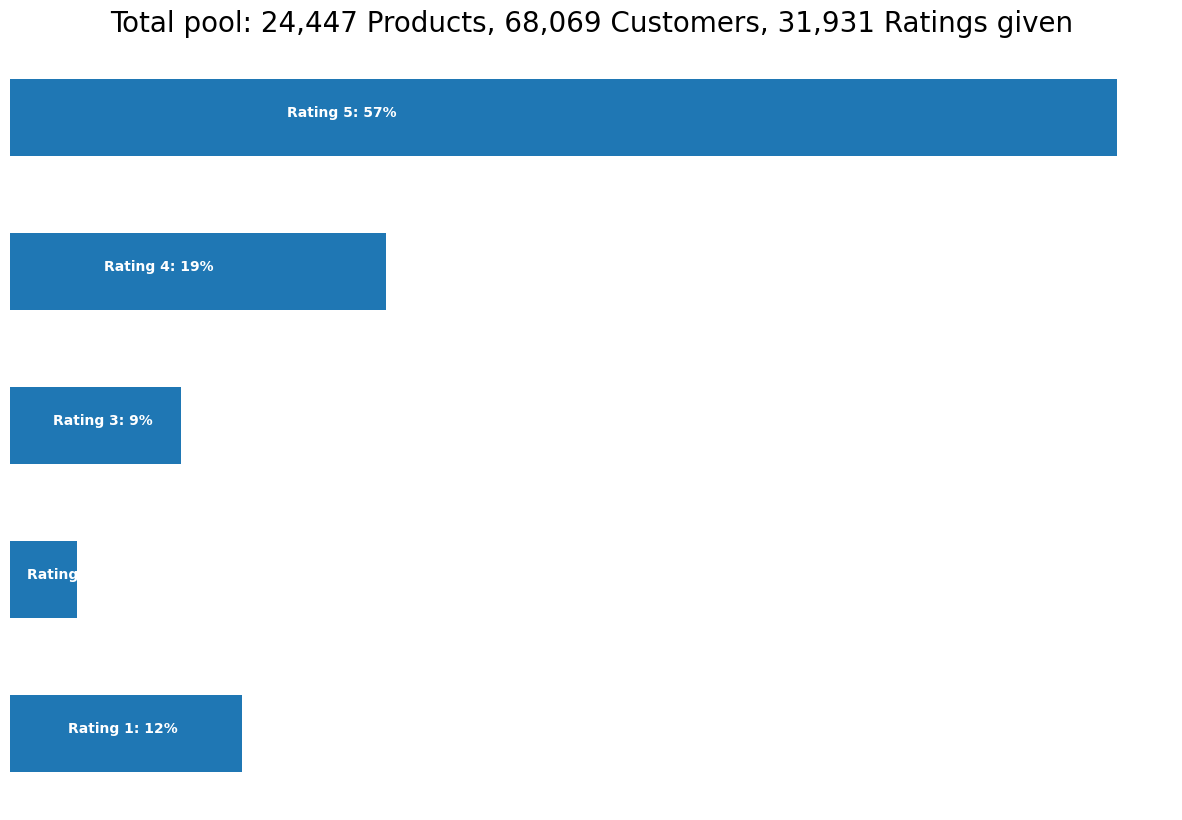

In [170]:
n = order_en.groupby('review_score')['review_score'].agg(['count'])

prod_count = order_en['product_id'].nunique()

cust_count = cust['customer_unique_id'].nunique() - prod_count

rating_count = order_en['review_score'].count() - cust_count

ax = n.plot(kind='barh', legend=False, figsize=(15, 10))
plt.title(
    'Total pool: {:,} Products, {:,} Customers, {:,} Ratings given'.format(
        prod_count, cust_count, rating_count),
    fontsize=20)
plt.axis('off')

for i in range(1, 6):
    ax.text(n.iloc[i - 1][0] / 4,
            i - 1,
            'Rating {}: {:.0f}%'.format(i,
                                        n.iloc[i - 1][0] * 100 / n.sum()[0]),
            color='white',
            weight='bold')

From the chart we can see that 57% of the products are rated 5. However, the 1 rate is 12%, which is quite high compared to the 2 and 3 rates.


We will look at the most popular product categories and measure that category by the number of reviews submitted in each product category

In [171]:
pop_prod = pd.DataFrame(
    order_en.groupby('product_id')['review_score'].count())
most_popular = pop_prod.sort_values('review_score', ascending=False)
most_popular.head(10)

,review_score
product_id,
99a4788cb24856965c36a24e339b6058,653
aca2eb7d00ea1a7b8ebd4e68314663af,615
422879e10f46682990de24d770e7f83d,475
d1c427060a0f73f6b889a5c7c61f2ac4,449
389d119b48cf3043d311335e499d9c6b,435
53759a2ecddad2bb87a079a1f1519f73,432
53b36df67ebb7c41585e8d54d6772e08,427
368c6c730842d78016ad823897a372db,380
2b4609f8948be18874494203496bc318,368


It would be easier if we display it in a chart, as shown below.

<Axes: ylabel='product_id'>

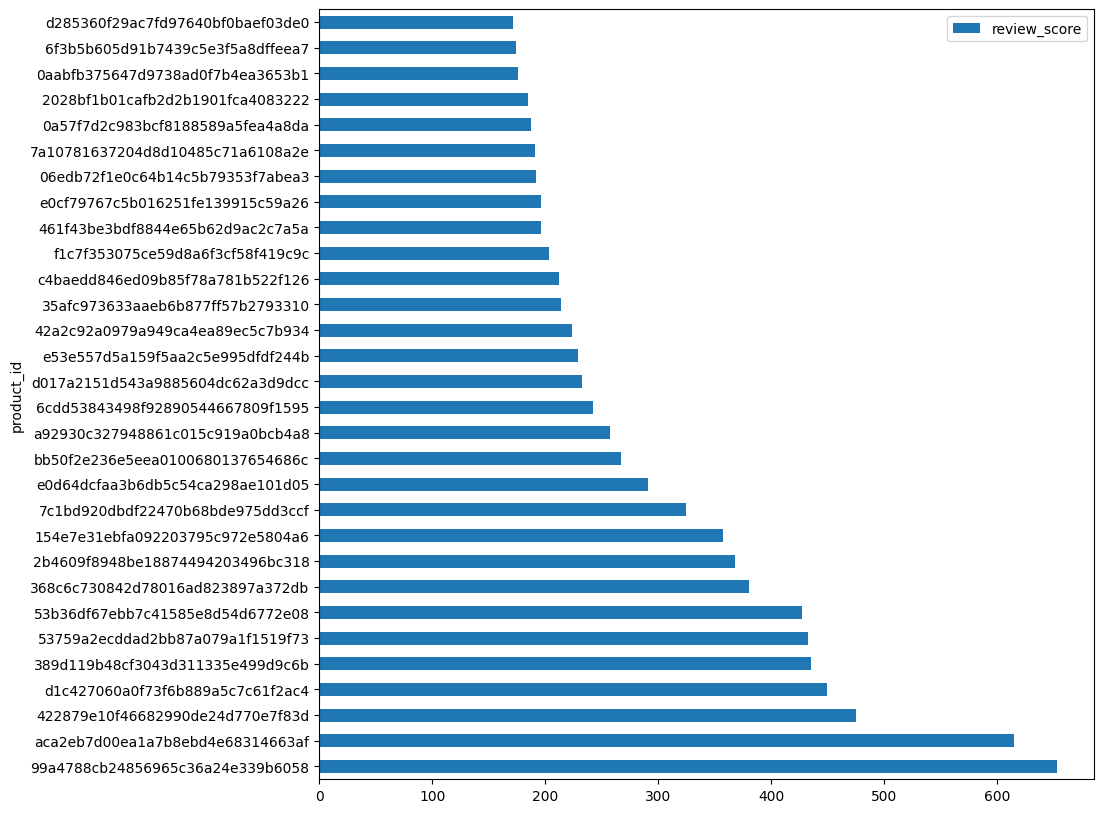

In [172]:
plt.rcParams['figure.figsize'] = (10, 10)
most_popular.head(30).plot(kind="barh")

From the chart above we can see that the product with ID 99a4788cb24856965c36a24e339b6058 has the highest rating

# *V. Conclusion*


The customer segmentation process is effective, using the RFMT model has helped us classify customers into different segments such as "Best Customers", "Loyal Spenders", "Potential Customers", etc. This provides insight into the shopping behavior and value of each customer group, thereby helping businesses have appropriate care and approach strategies.

The heat map and delivery time analysis have clearly identified areas with vibrant shopping
activities and areas with delivery problems. This analysis of transaction locations and
times supports the optimization of operations and improvement of delivery services.

The transaction time analysis has shown the times of the day, week, and month with the most transactions. From there, it is possible to indicate the appropriate times to launch effective promotion programs, optimize advertising strategies and campaigns.

Identify popular products and those that need further promotion. Sentiment analysis from product reviews provides information about customer satisfaction, helping businesses improve product and service quality.